# Build `gold_prob` 

In [ ]:
import pandas as pd

df = pd.read_csv("/home/a_zahedzadeh/self-explaination-thesis/results/models/evaluation/qwen_1.7B/en_with_goldprob/cohere/eval_cohere_r_command_20_with_goldprob.csv")

import numpy as np

df[~np.isclose(df['gold_prob_exp'], df['prob_exp'], rtol=1e-5, atol=1e-8)]


,index,question,options,gold,masked_explanation,pred_noexp,prob_noexp,pred_exp,prob_exp,is_correct_noexp,is_correct_exp,sufficiency,usefulness,probs_noexp,probs_exp,similarity_with_base,similarity_with_base_clean,gold_prob_noexp,gold_prob_exp,delta_gold_prob
5,5,Which land form is the result of the construct...,"['valleys carved by a moving glacier', 'piles ...",B,Glaciers erode and shape valleys.,A,0.874830,A,0.992384,False,False,False,False,[0.87482995 0.09238666 0.02999356 0.00278984],[0.99238354 0.00190154 0.00456155 0.00115334],0.768759,0.768759,0.092387,0.001902,-0.090485
13,13,The male insects in a population are treated t...,"['No, because the insects would still mate.', ...",C,Sterile males cannot reproduce.,C,0.521125,A,0.907407,True,False,False,False,[0.45989153 0.00312303 0.5211254 0.01586005],[0.90740734 0.00290505 0.08489802 0.00478962],0.535784,0.535784,0.521125,0.084898,-0.436227
17,17,"One evening as it is getting dark, Alex sits o...","[""The sun's light is reflected by the clouds.""...",D,Earth's rotation causes apparent sun motion.,D,0.548628,C,0.458381,True,False,False,False,[0.33146235 0.02419937 0.09571037 0.5486279 ],[0.13132845 0.00577017 0.4583813 0.40452006],0.765162,0.765161,0.548628,0.404520,-0.144108
18,18,A toothpaste commercial states that a brand of...,"['has a pleasant flavor.', 'is recommended by ...",C,High fluoride for healthy teeth.,C,0.518818,A,0.346716,True,False,False,False,[0.16909483 0.27879024 0.51881814 0.03329675],[0.3467165 0.3467165 0.23829454 0.06827252],0.622308,0.622308,0.518818,0.238295,-0.280524
26,26,Stars are often classified by their apparent b...,"['visible color', 'composition', 'surface text...",C,[MASK] is an external characteristic.,A,0.597986,A,0.853967,False,False,False,False,[0.5979862 0.02637651 0.09206308 0.28357422],[0.8539673 0.00652012 0.10199185 0.03752071],0.642888,0.507913,0.092063,0.101992,0.009929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2560,Human actions affect the environment. Which hu...,"['burning a forest', 'burning fossil fuels', '...",C,"Localized impact, minimal spread.",A,0.639412,A,0.448999,False,False,False,False,[0.6394115 0.09882601 0.09882601 0.16293652],[0.44899863 0.05341617 0.39779076 0.09979455],0.583276,0.622765,0.098826,0.397791,0.298965
2563,2563,The Sun is approximately 1.5 x 10^8 km from Ea...,"['2.0 light-seconds', '0.5 light-seconds', '2....",D,Converting and dividing yields 0.5.,A,0.919174,B,0.960305,False,False,False,False,[0.9191741 0.03145241 0.02775665 0.0216169 ],[0.03184882 0.96030456 0.0029624 0.00488418],0.500835,0.529377,0.021617,0.004884,-0.016733
2564,2564,"In many tropical areas, mosquitoes may carry a...","['predator-prey', 'competition for resources',...",C,Mosquitoes transmit parasites to humans.,A,0.724527,A,0.884850,False,False,False,False,[0.7245274 0.18247502 0.04649877 0.04649877],[0.88484955 0.02346558 0.08190294 0.00978191],0.718156,0.718156,0.046499,0.081903,0.035404
2575,2575,A microscope magnifies an object with 50x magn...,"['100 cm', '25 cm', '2.5 cm', '0.01 cm']",D,0.5 cm divided by 50 magnification.,C,0.838375,C,0.958818,False,False,False,False,[0.05359552 0.06073168 0.838375 0.04729788],[0.01989962 0.01502102 0.9588176 0.00626169],0.777579,0.775327,0.047298,0.006262,-0.041036


In [1]:
import os
import pandas as pd
import numpy as np

def parse_probs(val):
    if isinstance(val, str):
        return np.fromstring(val.strip("[]"), sep=" ")
    else:
        return np.array(val)

def get_gold_prob(row, probs_col):
    option_letters = ["A", "B", "C", "D"]
    gold_idx = option_letters.index(row["gold"])
    arr = parse_probs(row[probs_col])
    return arr[gold_idx]

def process_csv(file_path, out_dir):
    df = pd.read_csv(file_path)

    # اضافه کردن ستون‌ها
    df["gold_prob_noexp"] = df.apply(lambda r: get_gold_prob(r, "probs_noexp"), axis=1)
    df["gold_prob_exp"]   = df.apply(lambda r: get_gold_prob(r, "probs_exp"), axis=1)
    df["delta_gold_prob"] = df["gold_prob_exp"] - df["gold_prob_noexp"]

    # ذخیره در پوشه جدید (out_dir)
    os.makedirs(out_dir, exist_ok=True)
    base_name = os.path.basename(file_path)
    out_path = os.path.join(out_dir, base_name.replace(".csv", "_with_goldprob.csv"))
    df.to_csv(out_path, index=False)
    print(f"✅ ذخیره شد: {out_path}")

def process_all(root_dir, out_root="processed_results"):
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(subdir, file)
                # مسیر خروجی آینه‌ای (mirror) درست کن
                rel_path = os.path.relpath(subdir, root_dir)
                out_dir = os.path.join(out_root, rel_path)
                process_csv(file_path, out_dir)

# اجرای کلی
process_all("/home/a_zahedzadeh/self-explaination-thesis/results/models/evaluation/qwen_1.7B/en_with_goldprob", out_root="en_with_goldprob")


✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_80_with_goldprob_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_10_with_goldprob_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_30_with_goldprob_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_50_with_goldprob_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_60_with_goldprob_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_20_with_goldprob_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_0_with_goldprob_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_70_with_goldprob_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_90_with_goldprob_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/gpt_4o_mini/eval_gpt_4o_mini_40_with_goldprob_with_goldprob.csv
✅ ذخیره شد: en_with_goldprob/mistral/eval_mistral_small_3.1_0_with_gold

# Metrics_Function

In [6]:
import pandas as pd
import glob
import os

def compute_metrics(folder: str, prefix: str) -> pd.DataFrame:
    """
    Compute accuracy, sufficiency, and similarities for all CSVs in a folder
    that start with the given prefix.
    
    Args:
        folder (str): Path to folder containing eval CSV files.
        prefix (str): Prefix of the filenames (e.g. 'eval_cohere_r_command_').
        
    Returns:
        pd.DataFrame: Summary table of metrics across versions.
    """
    files = sorted(glob.glob(os.path.join(folder, f"{prefix}*.csv")))
    results = []

    for f in files:
        print(f)
        version = os.path.splitext(os.path.basename(f))[0].split("_")[-3]
        df = pd.read_csv(f)

        # Accuracy with explanation
        acc_exp = df["is_correct_exp"].mean()

        # Accuracy without explanation (baseline)
        acc_noexp = df["is_correct_noexp"].mean() if "is_correct_noexp" in df else None

        # Sufficiency (mean prob of correct answer given explanation)
        suff = df["gold_prob_exp"].mean()

        # Similarities (may not exist in baseline)
        sim = df["similarity_with_base"].mean() if "similarity_with_base" in df else None
        sim_clean = df["similarity_with_base_clean"].mean() if "similarity_with_base_clean" in df else None
        bert_score = df['bertscore_F1_clean'].mean()

        results.append({
            "version": version,
            "accuracy_exp": acc_exp,
            "accuracy_noexp": acc_noexp,
            "sufficiency": suff,
            "similarity": sim,
            "similarity_clean": sim_clean,
            "bert_score":bert_score,
        })

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="version").reset_index(drop=True)
    return results_df


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np

# Set publication-ready style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def plot_metrics(results_df, model_name="Model"):
    """
    Create publication-ready plots for accuracy, sufficiency, and similarity metrics.
    
    Args:
        results_df (pd.DataFrame): Results dataframe with version and metric columns
        model_name (str): Name of the model for the title
    """
    results_df["version"] = results_df["version"].astype(int)
    baseline_df = results_df[results_df["version"] == 0]
    other_df = results_df[results_df["version"] != 0].sort_values(by="version", ascending=False)
    plot_df = pd.concat([baseline_df, other_df])
    
    # Define consistent styling
    display_labels = ["Baseline", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    x_pos = range(len(plot_df))
    
    # Create figure with publication-ready dimensions
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), facecolor='white')
    fig.patch.set_facecolor('white')
    
    # Color scheme for consistency
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    
    # Plot 1: Accuracy
    axs[0].plot(x_pos, plot_df["accuracy_exp"], marker="o", linewidth=2.5, 
                markersize=8, color=colors[0], label="With Explanation", zorder=3)
    if "accuracy_noexp" in plot_df.columns:
        axs[0].plot(x_pos, plot_df["accuracy_noexp"], marker="s", linewidth=2.5, 
                    markersize=8, linestyle="--", color=colors[1], 
                    label="Without Explanation", zorder=3)
    
    axs[0].set_title("Model Accuracy", fontsize=14, fontweight='bold', pad=15)
    axs[0].set_ylabel("Accuracy Score", fontsize=12)
    axs[0].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    axs[0].legend(frameon=True, fancybox=True, shadow=True, loc='best')
    axs[0].set_ylim(bottom=min(plot_df["accuracy_exp"]) * 0.95)
    
    # Plot 2: Sufficiency
    axs[1].plot(x_pos, plot_df["sufficiency"], marker="^", linewidth=2.5, 
                markersize=8, color=colors[2], zorder=3)
    axs[1].set_title("Explanation Sufficiency", fontsize=14, fontweight='bold', pad=15)
    axs[1].set_ylabel("Sufficiency Score", fontsize=12)
    axs[1].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    axs[1].set_ylim(bottom=min(plot_df["sufficiency"]) * 0.95)
    
    # Plot 3: Similarity
    if "similarity" in plot_df.columns:
        axs[2].plot(x_pos, plot_df["similarity"], marker="o", linewidth=2.5, 
                    markersize=8, color='#C73E1D', label="Original", zorder=3)
    if "similarity_clean" in plot_df.columns:
        axs[2].plot(x_pos, plot_df["similarity_clean"], marker="^", linewidth=2.5, 
                    markersize=8, color='#7209B7', label="Cleaned", zorder=3)
    
    axs[2].set_title("Output Similarity", fontsize=14, fontweight='bold', pad=15)
    axs[2].set_ylabel("Similarity Score", fontsize=12)
    axs[2].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    axs[2].legend(frameon=True, fancybox=True, shadow=True, loc='best')
    if "similarity" in plot_df.columns:
        axs[2].set_ylim(bottom=min(plot_df["similarity"]) * 0.95)
    
    # Common styling for all subplots
    for i, ax in enumerate(axs):
        ax.set_xticks(x_pos)
        ax.set_xticklabels(display_labels, fontsize=11)
        ax.set_xlabel("Constraint Level", fontsize=12, fontweight='bold')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.8)
        ax.spines['bottom'].set_linewidth(0.8)
        
        # Add subtle background shading for baseline
        ax.axvspan(-0.5, 0.5, alpha=0.1, color='gray', zorder=1)
    
    # Main title
    fig.suptitle(f"Performance Metrics Evaluation: {model_name}", 
                 fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.15)
    plt.show()


def plot_multi_models(dfs: dict, metric: str, title: str, save_path=None):
    """
    Create publication-ready multi-model comparison plot.
    
    Args:
        dfs (dict): Dictionary of model names and their dataframes
        metric (str): Metric column name to plot
        title (str): Plot title
        save_path (str, optional): Path to save the figure
    """
    # Create publication-ready figure
    plt.figure(figsize=(12, 7), facecolor='white')
    
    # Enhanced color palette for multiple models
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
              '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    # Line styles for variety
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    
    display_labels = ["Baseline", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    
    for i, (model_name, df) in enumerate(dfs.items()):
        df = df.copy()
        df["version"] = df["version"].astype(int)
        baseline_df = df[df["version"] == 0]
        other_df = df[df["version"] != 0].sort_values(by="version", ascending=False)
        plot_df = pd.concat([baseline_df, other_df])
        
        x_pos = range(len(plot_df))
        
        plt.plot(x_pos, plot_df[metric], 
                marker=markers[i % len(markers)], 
                linewidth=3, 
                markersize=9,
                color=colors[i % len(colors)],
                linestyle=line_styles[i % len(line_styles)],
                label=model_name,
                zorder=3)
    
    # Styling
    plt.xticks(x_pos, display_labels, fontsize=12)
    plt.xlabel("Constraint Level", fontsize=14, fontweight='bold')
    plt.ylabel(f"{metric.replace('_', ' ').title()} Score", fontsize=14, fontweight='bold')
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Enhanced legend
    plt.legend(frameon=True, fancybox=True, shadow=True, 
              bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
    
    # Grid and styling
    plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    
    # Highlight baseline region
    plt.axvspan(-0.5, 0.5, alpha=0.1, color='gray', zorder=1)
    
    # Removed the bottom constraint level annotation text
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12, right=0.85)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"Figure saved to: {save_path}")
    
    plt.show()


def plot_heatmap_comparison(dfs: dict, metrics: list, title: str = "Model Performance Heatmap"):
    """
    Create a heatmap comparison of multiple metrics across models and constraint levels.
    
    Args:
        dfs (dict): Dictionary of model names and their dataframes
        metrics (list): List of metric column names
        title (str): Heatmap title
    """
    # Prepare data for heatmap
    heatmap_data = []
    model_names = []
    
    display_labels = ["Baseline", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    
    for model_name, df in dfs.items():
        df = df.copy()
        df["version"] = df["version"].astype(int)
        baseline_df = df[df["version"] == 0]
        other_df = df[df["version"] != 0].sort_values(by="version", ascending=False)
        plot_df = pd.concat([baseline_df, other_df])
        
        for metric in metrics:
            if metric in plot_df.columns:
                heatmap_data.append(plot_df[metric].values)
                model_names.append(f"{model_name} - {metric.replace('_', ' ').title()}")
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(12, len(model_names) * 0.6), facecolor='white')
    
    heatmap_array = np.array(heatmap_data)
    im = ax.imshow(heatmap_array, cmap='RdYlGn', aspect='auto', interpolation='nearest')
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax, shrink=0.8)
    cbar.set_label('Performance Score', fontsize=12, fontweight='bold')
    
    # Labels
    ax.set_xticks(range(len(display_labels)))
    ax.set_xticklabels(display_labels, rotation=45, ha='right')
    ax.set_yticks(range(len(model_names)))
    ax.set_yticklabels(model_names, fontsize=10)
    
    ax.set_xlabel("Constraint Level", fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    
    # Add value annotations
    for i in range(len(model_names)):
        for j in range(len(display_labels)):
            text = ax.text(j, i, f'{heatmap_array[i, j]:.3f}',
                          ha="center", va="center", color="black", fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [26]:
def plot_similarity_heatmap(dfs: dict, language: str = "English", save_path: str = None):
    """
    Create a publication-ready heatmap of embedding similarity across models and constraint levels.

    Args:
        dfs (dict): Dictionary where keys are model names and values are DataFrames containing 'version' and 'similarity_clean' columns.
        language (str): Language label for the plot title (e.g., "English" or "Persian").
        save_path (str, optional): Path to save the heatmap image.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    from matplotlib.patches import Rectangle

    # Prepare heatmap data
    display_labels = ["Baseline", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    heatmap_data = []
    model_names = []

    for model_name, df in dfs.items():
        df = df.copy()
        df["version"] = df["version"].astype(int)
        baseline_df = df[df["version"] == 0]
        other_df = df[df["version"] != 0].sort_values(by="version", ascending=False)
        plot_df = pd.concat([baseline_df, other_df])
        
        # Choose column (prefer cleaned version if available)
        if "similarity_clean" in plot_df.columns:
            heatmap_data.append(plot_df["similarity_clean"].values)
        elif "similarity" in plot_df.columns:
            heatmap_data.append(plot_df["similarity"].values)
        else:
            raise ValueError(f"Neither 'similarity' nor 'similarity_clean' column found for model {model_name}")
        
        model_names.append(model_name)

    heatmap_array = np.array(heatmap_data)

    # Create figure with better proportions
    fig, ax = plt.subplots(figsize=(12, len(model_names) * 0.7 + 1.5), facecolor='white')
    
    # Use a professional academic colormap
    # Options: RdYlGn_r (red-yellow-green), coolwarm, viridis, or custom
    from matplotlib.colors import LinearSegmentedColormap
    
    # Custom colormap: white -> light blue -> dark blue (better for print/grayscale)
    colors = ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c', '#08306b']
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('custom_blue', colors, N=n_bins)
    
    # Alternative: Viridis (colorblind-friendly)
    # cmap = 'viridis'
    
    # Alternative: RdYlGn reversed (red=low, green=high)
    # cmap = 'RdYlGn'

    # Draw heatmap with improved styling
    sns.heatmap(
        heatmap_array,
        cmap=cmap,
        annot=True,
        fmt=".3f",
        linewidths=1.0,
        linecolor='white',
        cbar_kws={
            'label': 'Embedding Similarity',
            'shrink': 0.8,
            'aspect': 20,
            'pad': 0.02
        },
        vmin=0.5,  # Set min value for better color contrast
        vmax=0.95,  # Set max value
        ax=ax,
        annot_kws={'fontsize': 9, 'fontweight': 'medium'}
    )

    # Improve colorbar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label('Embedding Similarity', fontsize=12, fontweight='bold', rotation=270, labelpad=20)

    # Customize labels and titles
    ax.set_xticks(np.arange(len(display_labels)) + 0.5)
    ax.set_xticklabels(display_labels, fontsize=11)
    ax.set_yticks(np.arange(len(model_names)) + 0.5)
    ax.set_yticklabels(model_names, rotation=0, fontsize=11, va='center')

    ax.set_xlabel("Constraint Level", fontsize=13, fontweight='bold', labelpad=10)
    ax.set_ylabel("Model", fontsize=13, fontweight='bold', labelpad=10)
    ax.set_title(
        f"Embedding Similarity Across Models ({language})", 
        fontsize=15, 
        fontweight='bold', 
        pad=20
    )

    # Add subtle baseline highlight with better styling
    rect = Rectangle(
        (0, 0), 
        1, 
        len(model_names), 
        fill=True, 
        facecolor='none',
        edgecolor='darkgray',
        linewidth=2.5,
        linestyle='--',
        alpha=0.6,
        zorder=10
    )
    ax.add_patch(rect)

    # Improve grid and spines
    ax.tick_params(axis='both', which='both', length=0)
    for spine in ax.spines.values():
        spine.set_edgecolor('#333333')
        spine.set_linewidth(1.5)

    # Tidy layout
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"✓ Heatmap saved to: {save_path}")

    plt.show()

## Claude

In [8]:
claude_df = compute_metrics("claude", "eval_claude_3_haiku_")
claude_df

claude/eval_claude_3_haiku_0_with_goldprob.csv
claude/eval_claude_3_haiku_10_with_goldprob.csv
claude/eval_claude_3_haiku_20_with_goldprob.csv
claude/eval_claude_3_haiku_30_with_goldprob.csv
claude/eval_claude_3_haiku_40_with_goldprob.csv
claude/eval_claude_3_haiku_50_with_goldprob.csv
claude/eval_claude_3_haiku_60_with_goldprob.csv
claude/eval_claude_3_haiku_70_with_goldprob.csv
claude/eval_claude_3_haiku_80_with_goldprob.csv
claude/eval_claude_3_haiku_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean,bert_score
0,0,0.862069,0.71174,0.830578,NaN,NaN,1.000000
1,10,0.828749,0.71174,0.781794,0.661400,0.669648,0.960726
2,20,0.831461,0.71174,0.794030,0.754894,0.762059,0.966071
3,30,0.848508,0.71174,0.804921,0.805928,0.812099,0.969910
4,40,0.846959,0.71174,0.812921,0.831252,0.837705,0.972200
5,50,0.852383,0.71174,0.817342,0.841518,0.848386,0.973283
6,60,0.854707,0.71174,0.820167,0.850156,0.857235,0.974095
7,70,0.855870,0.71174,0.821610,0.857712,0.864955,0.974530
8,80,0.853158,0.71174,0.821201,0.865163,0.872693,0.975905
9,90,0.857032,0.71174,0.824559,0.872764,0.880185,0.976814


## GPT

In [9]:
gpt_df = compute_metrics("gpt_4o_mini", "eval_gpt_4o_mini_")
gpt_df

gpt_4o_mini/eval_gpt_4o_mini_0_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_10_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_20_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_30_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_40_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_50_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_60_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_70_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_80_with_goldprob.csv
gpt_4o_mini/eval_gpt_4o_mini_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean,bert_score
0,0,0.893452,0.71174,0.861808,NaN,NaN,1.000000
1,10,0.832623,0.71174,0.784190,0.615903,0.623687,0.960082
2,20,0.852383,0.71174,0.805033,0.702027,0.711257,0.963198
3,30,0.862844,0.71174,0.819203,0.762681,0.772458,0.966146
4,40,0.873692,0.71174,0.831729,0.806133,0.815740,0.968874
5,50,0.876404,0.71174,0.837007,0.835769,0.845480,0.971070
6,60,0.880279,0.71174,0.845261,0.857652,0.867835,0.972810
7,70,0.890740,0.71174,0.853462,0.875391,0.886075,0.974431
8,80,0.893065,0.71174,0.858174,0.889263,0.899271,0.975685
9,90,0.892290,0.71174,0.859008,0.898990,0.909736,0.976677


## Cohere

In [10]:
cohere_df = compute_metrics("cohere", "eval_cohere_r_command_")
cohere_df

cohere/eval_cohere_r_command_0_with_goldprob.csv
cohere/eval_cohere_r_command_10_with_goldprob.csv
cohere/eval_cohere_r_command_20_with_goldprob.csv
cohere/eval_cohere_r_command_30_with_goldprob.csv
cohere/eval_cohere_r_command_40_with_goldprob.csv
cohere/eval_cohere_r_command_50_with_goldprob.csv
cohere/eval_cohere_r_command_60_with_goldprob.csv
cohere/eval_cohere_r_command_70_with_goldprob.csv
cohere/eval_cohere_r_command_80_with_goldprob.csv
cohere/eval_cohere_r_command_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean,bert_score
0,0,0.850058,0.71174,0.818158,NaN,NaN,1.000000
1,10,0.795816,0.71174,0.745721,0.589759,0.593725,0.961520
2,20,0.807439,0.71174,0.760840,0.682581,0.684795,0.962721
3,30,0.811313,0.71174,0.769167,0.722988,0.726150,0.964392
4,40,0.812863,0.71174,0.772007,0.751572,0.755322,0.965362
5,50,0.816738,0.71174,0.776284,0.775333,0.779007,0.966433
6,60,0.818287,0.71174,0.780331,0.794160,0.798540,0.967277
7,70,0.825262,0.71174,0.786419,0.811670,0.816446,0.968090
8,80,0.830686,0.71174,0.791381,0.825693,0.830384,0.968828
9,90,0.831461,0.71174,0.794786,0.837877,0.842754,0.969601


## LLama

In [11]:
llama_df = compute_metrics("llama", "eval_llama_4_maverik_")
llama_df

llama/eval_llama_4_maverik_0_with_goldprob.csv
llama/eval_llama_4_maverik_10_with_goldprob.csv
llama/eval_llama_4_maverik_20_with_goldprob.csv
llama/eval_llama_4_maverik_30_with_goldprob.csv
llama/eval_llama_4_maverik_40_with_goldprob.csv
llama/eval_llama_4_maverik_50_with_goldprob.csv
llama/eval_llama_4_maverik_60_with_goldprob.csv
llama/eval_llama_4_maverik_70_with_goldprob.csv
llama/eval_llama_4_maverik_80_with_goldprob.csv
llama/eval_llama_4_maverik_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean,bert_score
0,0,0.918636,0.712515,0.881673,NaN,NaN,1.000000
1,10,0.831848,0.712515,0.776905,0.597881,0.604056,0.960286
2,20,0.848508,0.712515,0.804218,0.694098,0.704760,0.963950
3,30,0.859744,0.712515,0.819334,0.748862,0.760657,0.966891
4,40,0.877567,0.712515,0.832677,0.783669,0.796235,0.969261
5,50,0.884153,0.712515,0.840554,0.805946,0.818998,0.971001
6,60,0.891902,0.712515,0.847035,0.823152,0.836979,0.972311
7,70,0.898876,0.712515,0.855522,0.836293,0.850958,0.973171
8,80,0.899651,0.712515,0.858776,0.846000,0.860623,0.974085
9,90,0.900814,0.712515,0.863806,0.855688,0.871208,0.974393


In [12]:
llama_df_scout = compute_metrics("llama_scout", "eval_llama_4_scout_")
llama_df_scout

llama_scout/eval_llama_4_scout_masked_0_with_goldprob.csv
llama_scout/eval_llama_4_scout_masked_10_with_goldprob.csv
llama_scout/eval_llama_4_scout_masked_20_with_goldprob.csv
llama_scout/eval_llama_4_scout_masked_30_with_goldprob.csv
llama_scout/eval_llama_4_scout_masked_40_with_goldprob.csv
llama_scout/eval_llama_4_scout_masked_50_with_goldprob.csv
llama_scout/eval_llama_4_scout_masked_60_with_goldprob.csv
llama_scout/eval_llama_4_scout_masked_70_with_goldprob.csv
llama_scout/eval_llama_4_scout_masked_80_with_goldprob.csv
llama_scout/eval_llama_4_scout_masked_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean,bert_score
0,0,0.897674,0.711628,0.865613,None,NaN,1.000000
1,10,0.844186,0.711628,0.793935,None,0.641638,0.957652
2,20,0.857752,0.711628,0.815433,None,0.730297,0.961485
3,30,0.870930,0.711628,0.827791,None,0.772798,0.965472
4,40,0.870543,0.711628,0.831816,None,0.801493,0.968083
5,50,0.881008,0.711628,0.841554,None,0.822484,0.968668
6,60,0.882558,0.711628,0.844999,None,0.843628,0.971828
7,70,0.887209,0.711628,0.848305,None,0.858223,0.973108
8,80,0.887597,0.711628,0.850556,None,0.866212,0.973993
9,90,0.886047,0.711628,0.853153,None,0.873292,0.974663


## Deepseek

In [13]:
deepseek_df = compute_metrics("deepseek", "eval_deepseek_v3.1_")
deepseek_df

deepseek/eval_deepseek_v3.1_0_with_goldprob.csv
deepseek/eval_deepseek_v3.1_10_with_goldprob.csv
deepseek/eval_deepseek_v3.1_20_with_goldprob.csv
deepseek/eval_deepseek_v3.1_30_with_goldprob.csv
deepseek/eval_deepseek_v3.1_40_with_goldprob.csv
deepseek/eval_deepseek_v3.1_50_with_goldprob.csv
deepseek/eval_deepseek_v3.1_60_with_goldprob.csv
deepseek/eval_deepseek_v3.1_70_with_goldprob.csv
deepseek/eval_deepseek_v3.1_80_with_goldprob.csv
deepseek/eval_deepseek_v3.1_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean,bert_score
0,0,0.907400,0.71174,0.873260,NaN,NaN,1.000000
1,10,0.841147,0.71174,0.786842,0.597951,0.607101,0.960418
2,20,0.862069,0.71174,0.808420,0.665568,0.677204,0.962003
3,30,0.869430,0.71174,0.821310,0.710050,0.721974,0.963555
4,40,0.883766,0.71174,0.832515,0.742446,0.755558,0.965228
5,50,0.886478,0.71174,0.839502,0.765120,0.778337,0.966260
6,60,0.889578,0.71174,0.844276,0.784053,0.797486,0.967271
7,70,0.896939,0.71174,0.852909,0.798638,0.811979,0.967892
8,80,0.898102,0.71174,0.853813,0.811059,0.825409,0.968534
9,90,0.901201,0.71174,0.859711,0.827297,0.840714,0.969365


## Gemini

In [14]:
gemini_df = compute_metrics("gemini", "eval_gemini_2.0_flash_")
gemini_df

gemini/eval_gemini_2.0_flash_0_with_goldprob.csv
gemini/eval_gemini_2.0_flash_10_with_goldprob.csv
gemini/eval_gemini_2.0_flash_20_with_goldprob.csv
gemini/eval_gemini_2.0_flash_30_with_goldprob.csv
gemini/eval_gemini_2.0_flash_40_with_goldprob.csv
gemini/eval_gemini_2.0_flash_50_with_goldprob.csv
gemini/eval_gemini_2.0_flash_60_with_goldprob.csv
gemini/eval_gemini_2.0_flash_70_with_goldprob.csv
gemini/eval_gemini_2.0_flash_80_with_goldprob.csv
gemini/eval_gemini_2.0_flash_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean,bert_score
0,0,0.897714,0.71174,0.857499,NaN,NaN,1.000000
1,10,0.822937,0.71174,0.777981,0.642088,0.647249,0.961554
2,20,0.855482,0.71174,0.812718,0.738644,0.744572,0.963998
3,30,0.876792,0.71174,0.829868,0.792207,0.798056,0.966752
4,40,0.887253,0.71174,0.844227,0.825845,0.831884,0.968669
5,50,0.887640,0.71174,0.849891,0.848825,0.854730,0.970340
6,60,0.888415,0.71174,0.852917,0.862534,0.868196,0.971424
7,70,0.895777,0.71174,0.855929,0.872262,0.877988,0.972333
8,80,0.901976,0.71174,0.861140,0.878374,0.884315,0.972767
9,90,0.902363,0.71174,0.864358,0.884798,0.890757,0.973490


## Mistral

In [15]:
mistral_df = compute_metrics("mistral", "eval_mistral_small_3.1_")
mistral_df

mistral/eval_mistral_small_3.1_0_with_goldprob.csv
mistral/eval_mistral_small_3.1_10_with_goldprob.csv
mistral/eval_mistral_small_3.1_20_with_goldprob.csv
mistral/eval_mistral_small_3.1_30_with_goldprob.csv
mistral/eval_mistral_small_3.1_40_with_goldprob.csv
mistral/eval_mistral_small_3.1_50_with_goldprob.csv
mistral/eval_mistral_small_3.1_60_with_goldprob.csv
mistral/eval_mistral_small_3.1_70_with_goldprob.csv
mistral/eval_mistral_small_3.1_80_with_goldprob.csv
mistral/eval_mistral_small_3.1_90_with_goldprob.csv


,version,accuracy_exp,accuracy_noexp,sufficiency,similarity,similarity_clean,bert_score
0,0,0.900039,0.71174,0.861861,NaN,NaN,1.000000
1,10,0.813251,0.71174,0.763708,0.596492,0.606380,0.959531
2,20,0.830686,0.71174,0.787167,0.669407,0.683690,0.961746
3,30,0.845021,0.71174,0.793211,0.711986,0.728163,0.963382
4,40,0.857807,0.71174,0.807604,0.747910,0.764041,0.965086
5,50,0.849283,0.71174,0.809253,0.772484,0.790051,0.966578
6,60,0.861682,0.71174,0.818422,0.791830,0.809810,0.967746
7,70,0.865556,0.71174,0.823885,0.805617,0.824267,0.968755
8,80,0.866718,0.71174,0.824152,0.815906,0.834726,0.969689
9,90,0.864394,0.71174,0.826085,0.828148,0.847396,0.970573


# Multi_Models

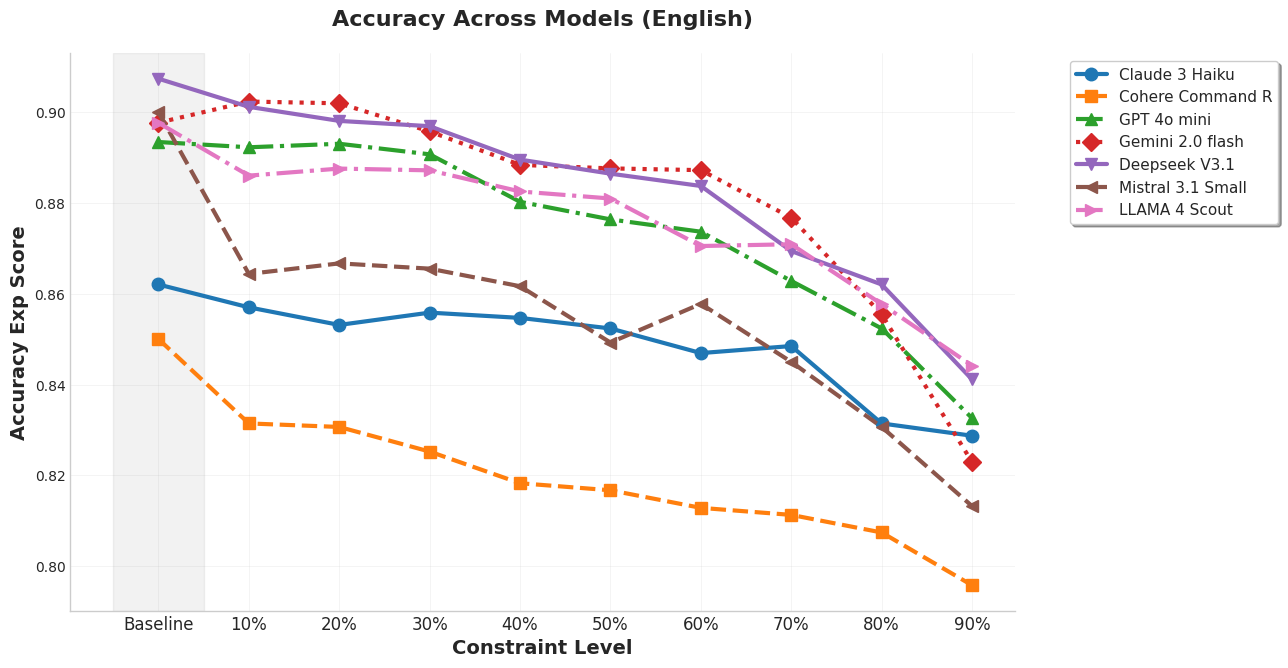

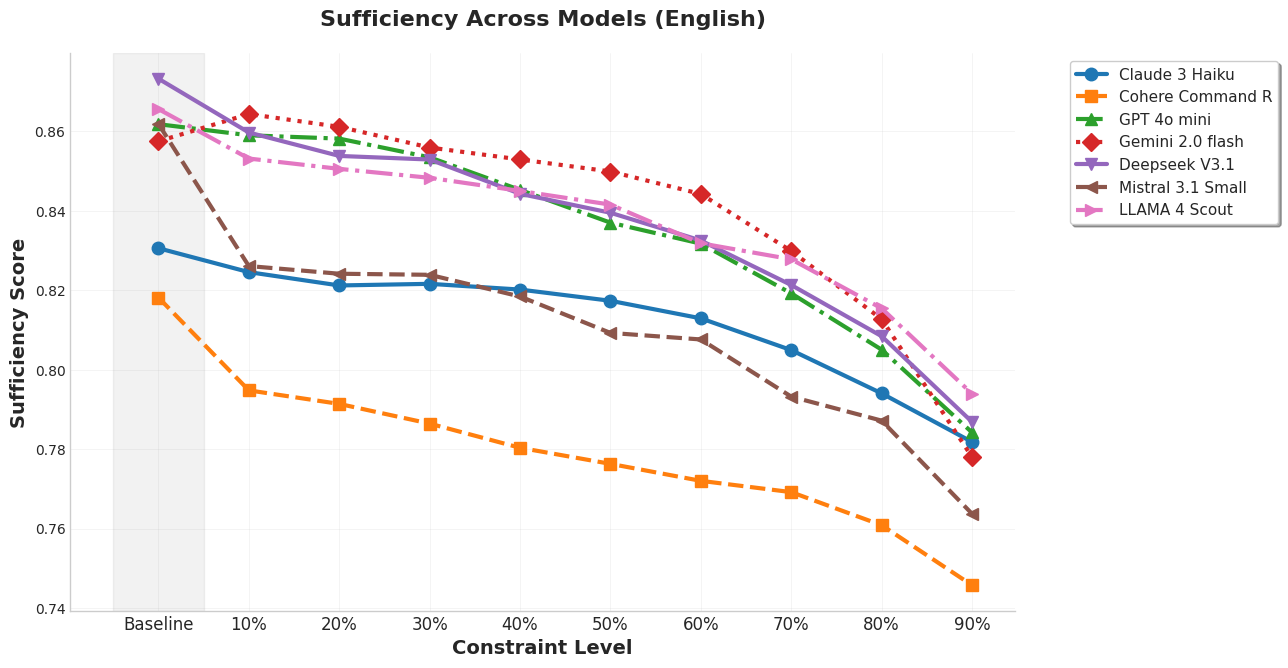

In [29]:
# دیکشنری از مدل‌ها
dfs = {
    "Claude 3 Haiku": claude_df,
    "Cohere Command R": cohere_df,
    "GPT 4o mini": gpt_df,
    #"LLAMA 4 Maverik": llama_df,
    "Gemini 2.0 flash": gemini_df,
    "Deepseek V3.1": deepseek_df,
    "Mistral 3.1 Small": mistral_df,
    "LLAMA 4 Scout": llama_df_scout,
}

# Accuracy
plot_multi_models(dfs, "accuracy_exp", "Accuracy Across Models (English)")

# Sufficiency
plot_multi_models(dfs, "sufficiency", "Sufficiency Across Models (English)")

# # Similarity Clean
# plot_multi_models(dfs, "similarity_clean", "Similarity Across Models (English)")

# plot_multi_models(dfs, "bert_score", "BertScore (English)")

✓ Heatmap saved to: similarity_heatmap_en.png


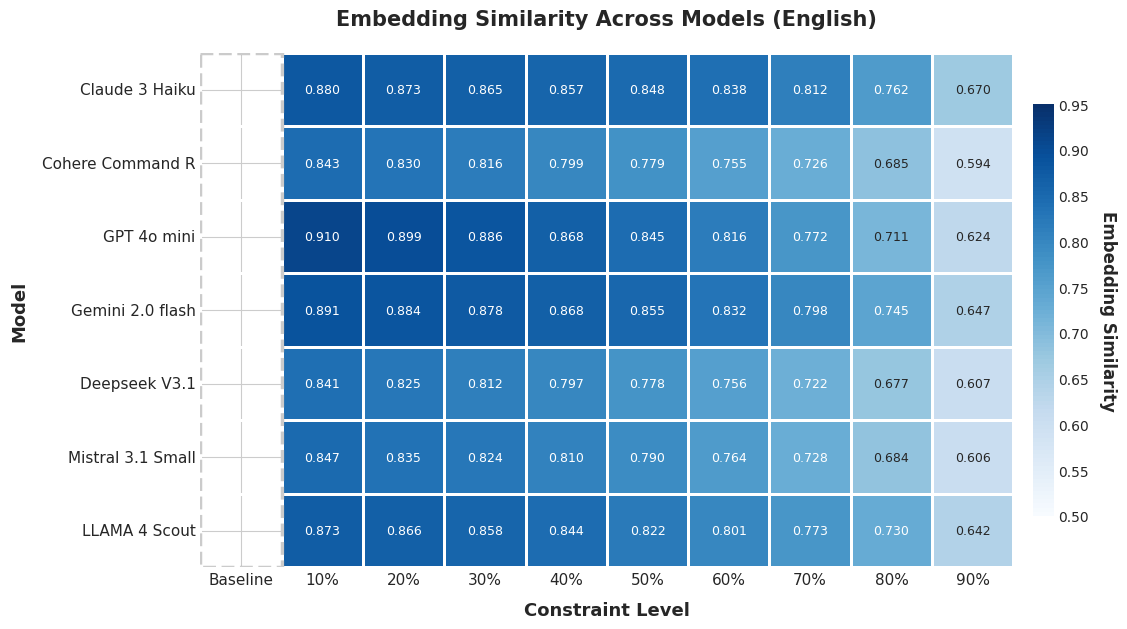

In [27]:
# فرض کن دو زبان داری:
# plot_similarity_heatmap(dfs, language="Persian", save_path="similarity_heatmap_fa.png")
plot_similarity_heatmap(dfs, language="English", save_path="similarity_heatmap_en.png")

# Other Visualization

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

# Set professional style
plt.style.use('default')
sns.set_palette("Set2")

def plot_grouped_comparison(dfs: dict, metrics: list, title: str = "Model Performance Comparison"):
    """
    Create a clean grouped bar chart comparison across models and metrics.
    """
    display_labels = ["Baseline", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    
    # Prepare data
    n_models = len(dfs)
    n_metrics = len(metrics)
    
    fig, axes = plt.subplots(1, n_metrics, figsize=(6*n_metrics, 8), facecolor='white')
    if n_metrics == 1:
        axes = [axes]
    
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#7209B7', '#2CA02C']
    
    for metric_idx, metric in enumerate(metrics):
        ax = axes[metric_idx]
        
        # Calculate bar positions
        bar_width = 0.8 / n_models
        x_pos = np.arange(len(display_labels))
        
        for model_idx, (model_name, df) in enumerate(dfs.items()):
            df = df.copy()
            df["version"] = df["version"].astype(int)
            baseline_df = df[df["version"] == 0]
            other_df = df[df["version"] != 0].sort_values(by="version", ascending=False)
            plot_df = pd.concat([baseline_df, other_df])
            
            if metric in plot_df.columns:
                values = plot_df[metric].values
                bar_positions = x_pos + (model_idx - n_models/2 + 0.5) * bar_width
                
                bars = ax.bar(bar_positions, values, bar_width, 
                             label=model_name, color=colors[model_idx % len(colors)],
                             alpha=0.8, edgecolor='white', linewidth=1)
                
                # Add value labels on bars
                for bar, value in zip(bars, values):
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                           f'{value:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        ax.set_title(f"{metric.replace('_', ' ').title()}", fontsize=14, fontweight='bold', pad=20)
        ax.set_ylabel("Performance Score", fontsize=12)
        ax.set_xlabel("Constraint Level", fontsize=12)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(display_labels, rotation=45, ha='right')
        ax.grid(True, alpha=0.3, axis='y')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Highlight baseline
        ax.axvspan(-0.5, 0.5, alpha=0.1, color='gray', zorder=0)
        
        if metric_idx == 0:
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    fig.suptitle(title, fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, right=0.85)
    plt.show()


def plot_radar_comparison(dfs: dict, constraint_level: str = "50%", title: str = "Model Performance Radar"):
    """
    Create a radar chart comparing models at a specific constraint level.
    """
    # Map constraint level to version
    constraint_map = {"Baseline": 0, "10%": 10, "20%": 20, "30%": 30, "40%": 40, 
                     "50%": 50, "60%": 60, "70%": 70, "80%": 80, "90%": 90}
    
    version = constraint_map.get(constraint_level, 50)
    
    # Prepare data for radar chart
    metrics = ["accuracy_exp", "sufficiency", "similarity"]
    metric_labels = ["Accuracy", "Sufficiency", "Similarity"]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'), facecolor='white')
    
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#7209B7', '#2CA02C']
    
    for i, (model_name, df) in enumerate(dfs.items()):
        df = df.copy()
        df["version"] = df["version"].astype(int)
        
        # Get data for specific constraint level
        model_data = df[df["version"] == version]
        if model_data.empty:
            continue
            
        values = []
        for metric in metrics:
            if metric in model_data.columns:
                values.append(model_data[metric].iloc[0])
            else:
                values.append(0)
        
        values += values[:1]  # Complete the circle
        
        ax.plot(angles, values, 'o-', linewidth=3, label=model_name, 
                color=colors[i % len(colors)], markersize=8)
        ax.fill(angles, values, alpha=0.25, color=colors[i % len(colors)])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metric_labels, fontsize=12, fontweight='bold')
    ax.set_ylim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=10)
    ax.grid(True, alpha=0.3)
    
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=11)
    plt.title(f"{title} at {constraint_level} Constraint Level", 
              fontsize=14, fontweight='bold', pad=30)
    
    plt.tight_layout()
    plt.show()


def plot_performance_trends(dfs: dict, save_path: str = None):
    """
    Create an advanced multi-panel performance trends visualization.
    """
    metrics = ["accuracy_exp", "sufficiency", "similarity"]
    metric_titles = ["Model Accuracy", "Explanation Sufficiency", "Output Similarity"]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), facecolor='white')
    fig.patch.set_facecolor('white')
    
    display_labels = ["Baseline", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    markers = ['o', 's', '^', 'D', 'v', '<']
    
    # Plot individual metrics
    for metric_idx, (metric, metric_title) in enumerate(zip(metrics, metric_titles)):
        if metric_idx < 3:
            row, col = metric_idx // 2, metric_idx % 2
            ax = axes[row, col]
            
            for model_idx, (model_name, df) in enumerate(dfs.items()):
                df = df.copy()
                df["version"] = df["version"].astype(int)
                baseline_df = df[df["version"] == 0]
                other_df = df[df["version"] != 0].sort_values(by="version", ascending=False)
                plot_df = pd.concat([baseline_df, other_df])
                
                if metric in plot_df.columns:
                    x_pos = range(len(plot_df))
                    ax.plot(x_pos, plot_df[metric], 
                           marker=markers[model_idx % len(markers)], 
                           linewidth=3, markersize=8,
                           color=colors[model_idx % len(colors)],
                           label=model_name if metric_idx == 0 else "")
            
            ax.set_title(metric_title, fontsize=14, fontweight='bold')
            ax.set_ylabel("Score", fontsize=12)
            ax.set_xlabel("Constraint Level", fontsize=12)
            ax.set_xticks(range(len(display_labels)))
            ax.set_xticklabels(display_labels, rotation=45, ha='right')
            ax.grid(True, alpha=0.3)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            # Highlight baseline
            ax.axvspan(-0.5, 0.5, alpha=0.1, color='gray', zorder=0)
    
    # Combined performance score in the fourth subplot
    ax = axes[1, 1]
    for model_idx, (model_name, df) in enumerate(dfs.items()):
        df = df.copy()
        df["version"] = df["version"].astype(int)
        baseline_df = df[df["version"] == 0]
        other_df = df[df["version"] != 0].sort_values(by="version", ascending=False)
        plot_df = pd.concat([baseline_df, other_df])
        
        # Calculate combined score (average of available metrics)
        combined_scores = []
        for _, row in plot_df.iterrows():
            scores = []
            for metric in metrics:
                if metric in plot_df.columns and not pd.isna(row[metric]):
                    scores.append(row[metric])
            combined_scores.append(np.mean(scores) if scores else 0)
        
        x_pos = range(len(plot_df))
        ax.plot(x_pos, combined_scores, 
               marker=markers[model_idx % len(markers)], 
               linewidth=3, markersize=8,
               color=colors[model_idx % len(colors)],
               label=model_name)
    
    ax.set_title("Combined Performance Score", fontsize=14, fontweight='bold')
    ax.set_ylabel("Average Score", fontsize=12)
    ax.set_xlabel("Constraint Level", fontsize=12)
    ax.set_xticks(range(len(display_labels)))
    ax.set_xticklabels(display_labels, rotation=45, ha='right')
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axvspan(-0.5, 0.5, alpha=0.1, color='gray', zorder=0)
    
    # Add legend to the first subplot
    axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    fig.suptitle("Comprehensive Model Performance Analysis", 
                 fontsize=18, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, right=0.85)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"Figure saved to: {save_path}")
    
    plt.show()


def plot_delta_heatmap(dfs: dict, baseline_metric: str = "accuracy_exp", title: str = "Performance Change from Baseline"):
    """
    Create a heatmap showing performance changes relative to baseline.
    """
    fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
    
    delta_data = []
    model_names = list(dfs.keys())
    constraint_levels = ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
    
    for model_name, df in dfs.items():
        df = df.copy()
        df["version"] = df["version"].astype(int)
        
        baseline_value = df[df["version"] == 0][baseline_metric].iloc[0]
        
        model_deltas = []
        for version in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
            constraint_value = df[df["version"] == version][baseline_metric].iloc[0]
            delta = constraint_value - baseline_value
            model_deltas.append(delta)
        
        delta_data.append(model_deltas)
    
    delta_array = np.array(delta_data)
    
    # Create heatmap
    im = ax.imshow(delta_array, cmap='RdBu_r', aspect='auto', vmin=-0.1, vmax=0.1)
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Performance Change from Baseline', fontsize=12, fontweight='bold')
    
    # Labels
    ax.set_xticks(range(len(constraint_levels)))
    ax.set_xticklabels(constraint_levels)
    ax.set_yticks(range(len(model_names)))
    ax.set_yticklabels(model_names, fontsize=12)
    
    ax.set_xlabel("Constraint Level", fontsize=14, fontweight='bold')
    ax.set_ylabel("Models", fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Add value annotations
    for i in range(len(model_names)):
        for j in range(len(constraint_levels)):
            value = delta_array[i, j]
            color = 'white' if abs(value) > 0.05 else 'black'
            ax.text(j, i, f'{value:+.3f}', ha="center", va="center", 
                   color=color, fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# LONG DF 

In [18]:
import pandas as pd

all_dfs = []
for model_name, df in dfs.items():
    # keep only needed columns
    sub = df[["version", "accuracy_exp", "sufficiency", "similarity_clean", "bert_score"]].copy()
    sub["model"] = model_name
    all_dfs.append(sub)

merged_df = pd.concat(all_dfs, ignore_index=True)

merged_df.tail(20)

,version,accuracy_exp,sufficiency,similarity_clean,bert_score,model
50,0,0.900039,0.861861,NaN,1.000000,Mistral 3.1 Small
51,10,0.813251,0.763708,0.606380,0.959531,Mistral 3.1 Small
52,20,0.830686,0.787167,0.683690,0.961746,Mistral 3.1 Small
53,30,0.845021,0.793211,0.728163,0.963382,Mistral 3.1 Small
54,40,0.857807,0.807604,0.764041,0.965086,Mistral 3.1 Small
55,50,0.849283,0.809253,0.790051,0.966578,Mistral 3.1 Small
56,60,0.861682,0.818422,0.809810,0.967746,Mistral 3.1 Small
57,70,0.865556,0.823885,0.824267,0.968755,Mistral 3.1 Small
58,80,0.866718,0.824152,0.834726,0.969689,Mistral 3.1 Small
59,90,0.864394,0.826085,0.847396,0.970573,Mistral 3.1 Small


                  accuracy_exp  sufficiency  similarity_clean  bert_score
accuracy_exp          1.000000     0.983242          0.653626    0.479112
sufficiency           0.983242     1.000000          0.763482    0.572581
similarity_clean      0.653626     0.763482          1.000000    0.944387
bert_score            0.479112     0.572581          0.944387    1.000000


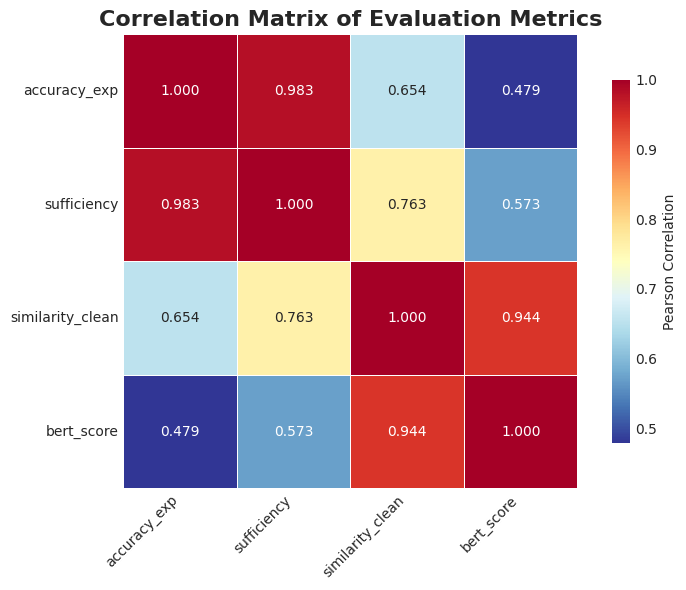

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = merged_df[["accuracy_exp", "sufficiency", "similarity_clean", "bert_score"]].corr(method="pearson")
print(corr)

# Enhanced visualization
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    corr,
    annot=True,
    cmap="RdYlBu_r",  # Diverging colormap for correlations (red-blue, reversed for positive on one side)
    fmt=".3f",
    square=True,  # Make cells square
    cbar_kws={'shrink': 0.8, 'label': 'Pearson Correlation'},
    linewidths=0.5,  # Add lines between cells
    annot_kws={"size": 10}  # Adjust annotation font size
)
plt.title("Correlation Matrix of Evaluation Metrics", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [23]:
merged_wide = (
    merged_df
    .pivot(index="version", columns="model", values=["accuracy_exp", "sufficiency", "similarity_clean", "bert_score"])
)

merged_wide

accuracy_exp                                             \
model   Claude 3 Haiku Cohere Command R Deepseek V3.1 GPT 4o mini   
version                                                             
0             0.862069         0.850058      0.907400    0.893452   
10            0.828749         0.795816      0.841147    0.832623   
20            0.831461         0.807439      0.862069    0.852383   
30            0.848508         0.811313      0.869430    0.862844   
40            0.846959         0.812863      0.883766    0.873692   
50            0.852383         0.816738      0.886478    0.876404   
60            0.854707         0.818287      0.889578    0.880279   
70            0.855870         0.825262      0.896939    0.890740   
80            0.853158         0.830686      0.898102    0.893065   
90            0.857032         0.831461      0.901201    0.892290   

                                                            sufficiency  \
model   Gemini 2.0 flash LLAMA 4 Scout Mistral 3.1 Small Claude 3 Haiku   
version                                                                   
0               0.897714      0.897674          0.900039       0.830578   
10              0.822937      0.844186          0.813251       0.781794   
20              0.855482      0.857752          0.830686       0.794030   
30              0.876792      0.870930          0.845021       0.804921   
40              0.887253      0.870543          0.857807       0.812921   
50              0.887640      0.881008          0.849283       0.817342   
60              0.888415      0.882558          0.861682       0.820167   
70              0.895777      0.887209          0.865556       0.821610   
80              0.901976      0.887597          0.866718       0.821201   
90              0.902363      0.886047          0.864394       0.824559   

                                        ... similarity_clean                \
model   Cohere Command R Deepseek V3.1  ... Gemini 2.0 flash LLAMA 4 Scout   
version                                 ...                                  
0               0.818158      0.873260  ...              NaN           NaN   
10              0.745721      0.786842  ...         0.647249      0.641638   
20              0.760840      0.808420  ...         0.744572      0.730297   
30              0.769167      0.821310  ...         0.798056      0.772798   
40              0.772007      0.832515  ...         0.831884      0.801493   
50              0.776284      0.839502  ...         0.854730      0.822484   
60              0.780331      0.844276  ...         0.868196      0.843628   
70              0.786419      0.852909  ...         0.877988      0.858223   
80              0.791381      0.853813  ...         0.884315      0.866212   
90              0.794786      0.859711  ...         0.890757      0.873292   

                              bert_score                                 \
model   Mistral 3.1 Small Claude 3 Haiku Cohere Command R Deepseek V3.1   
version                                                                   
0                     NaN       1.000000         1.000000      1.000000   
10               0.606380       0.960726         0.961520      0.960418   
20               0.683690       0.966071         0.962721      0.962003   
30               0.728163       0.969910         0.964392      0.963555   
40               0.764041       0.972200         0.965362      0.965228   
50               0.790051       0.973283         0.966433      0.966260   
60               0.809810       0.974095         0.967277      0.967271   
70               0.824267       0.974530         0.968090      0.967892   
80               0.834726       0.975905         0.968828      0.968534   
90               0.847396       0.976814         0.969601      0.969365   

                                                                      
model   GPT 4o mini Gemini 2.0 flash LLAMA 4 Scout Mistral 3.1 Small  
ver

In [24]:
merged_wide.columns

MultiIndex([(    'accuracy_exp',    'Claude 3 Haiku'),
            (    'accuracy_exp',  'Cohere Command R'),
            (    'accuracy_exp',     'Deepseek V3.1'),
            (    'accuracy_exp',       'GPT 4o mini'),
            (    'accuracy_exp',  'Gemini 2.0 flash'),
            (    'accuracy_exp',     'LLAMA 4 Scout'),
            (    'accuracy_exp', 'Mistral 3.1 Small'),
            (     'sufficiency',    'Claude 3 Haiku'),
            (     'sufficiency',  'Cohere Command R'),
            (     'sufficiency',     'Deepseek V3.1'),
            (     'sufficiency',       'GPT 4o mini'),
            (     'sufficiency',  'Gemini 2.0 flash'),
            (     'sufficiency',     'LLAMA 4 Scout'),
            (     'sufficiency', 'Mistral 3.1 Small'),
            ('similarity_clean',    'Claude 3 Haiku'),
            ('similarity_clean',  'Cohere Command R'),
            ('similarity_clean',     'Deepseek V3.1'),
            ('similarity_clean',       'GPT 4o mini'),
          

In [7]:
import pandas as pd
import glob
import os

def compute_mean_expl_length_per_model(base_folder: str) -> pd.DataFrame:
    """
    Compute the mean explanation length for each model and constraint version,
    including baseline files that contain 'explanation' instead of 'rewritten_explanation'.
    
    Args:
        base_folder (str): Path to the root folder containing model subfolders (e.g., 'prediction/')
    
    Returns:
        pd.DataFrame: Columns = [model, language, version, mean_length, is_baseline]
    """
    results = []

    for model_dir in sorted(os.listdir(base_folder)):
        model_path = os.path.join(base_folder, model_dir)
        if not os.path.isdir(model_path):
            continue

        # Handle subfolders like en / fa
        subfolders = [os.path.join(model_path, sf) for sf in os.listdir(model_path)
                      if os.path.isdir(os.path.join(model_path, sf))]
        if not subfolders:
            subfolders = [model_path]

        for sub in subfolders:
            lang = os.path.basename(sub)
            csv_files = sorted(glob.glob(os.path.join(sub, "*.csv")))

            for f in csv_files:
                try:
                    df = pd.read_csv(f)

                    # Detect baseline vs constrained
                    is_baseline = "length_constraint_percent" not in df.columns

                    if is_baseline:
                        # Baseline case → use 'explanation'
                        if "explanation" in df.columns:
                            mean_len = df["explanation"].dropna().apply(lambda x: len(str(x).split())).mean()
                            std_len = df["explanation"].dropna().apply(lambda x: len(str(x).split())).std()
                        else:
                            mean_len, std_len = None, None
                        version = 0  # baseline version always 0
                    else:
                        # Non-baseline → use rewritten_explanation or word_count
                        version = df["length_constraint_percent"].iloc[0]
                        if "rewritten_word_count" in df.columns:
                            mean_len = df["rewritten_word_count"].mean()
                            std_len = df["rewritten_word_count"].std()
                        elif "rewritten_explanation" in df.columns:
                            mean_len = df["rewritten_explanation"].dropna().apply(lambda x: len(str(x).split())).mean()
                            std_len = df["rewritten_explanation"].dropna().apply(lambda x: len(str(x).split())).std()
                        else:
                            mean_len, std_len = None, None

                    results.append({
                        "model": model_dir,
                        "language": lang,
                        "version": version,
                        "mean_length": mean_len,
                        "std_length": std_len,
                        "is_baseline": is_baseline
                    })

                except Exception as e:
                    print(f"[warn] Error reading {f}: {e}")
                    continue

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by=["model", "language", "version"]).reset_index(drop=True)
    return results_df


In [8]:
df_lengths = compute_mean_expl_length_per_model("/home/a_zahedzadeh/self-explaination-thesis/results/models/prediction")
print(df_lengths.head())

# Example output:
#            model language version  mean_length
# 0     claude_3_haiku       en       0.0     83.42
# 1     claude_3_haiku       en      10.0     75.13
# 2     claude_3_haiku       en      20.0     68.22
# ...


            model language  version  mean_length  std_length  is_baseline
0  claude_3_haiku       en        0    59.421929   11.782057         True
1  claude_3_haiku       en       10     6.889578    2.151755        False
2  claude_3_haiku       en       20    11.974041    4.215386        False
3  claude_3_haiku       en       30    17.555599    5.273058        False
4  claude_3_haiku       en       40    21.533902    5.092108        False


In [9]:
df_lengths

,model,language,version,mean_length,std_length,is_baseline
0,claude_3_haiku,en,0,59.421929,11.782057,True
1,claude_3_haiku,en,10,6.889578,2.151755,False
2,claude_3_haiku,en,20,11.974041,4.215386,False
3,claude_3_haiku,en,30,17.555599,5.273058,False
4,claude_3_haiku,en,40,21.533902,5.092108,False
...,...,...,...,...,...,...
158,mistral_small_3.1,fa,50,13.871755,5.298111,False
159,mistral_small_3.1,fa,60,15.558698,5.947130,False
160,mistral_small_3.1,fa,70,16.630376,6.481619,False
161,mistral_small_3.1,fa,80,19.153429,7.583061,False


In [10]:
def summarize_mean_length(df: pd.DataFrame) -> pd.DataFrame:
    """
    Group results by model, language, and version to compute average explanation length.
    
    Args:
        df (pd.DataFrame): Output of compute_mean_expl_length_per_model.
        
    Returns:
        pd.DataFrame: Grouped and averaged summary.
    """
    grouped = (
        df.groupby(["model", "language", "version"], as_index=False)
          .agg(mean_length=("mean_length", "mean"),
               std_length=("mean_length", "std"),
               count=("mean_length", "count"))
          .sort_values(["model", "language", "version"])
          .reset_index(drop=True)
    )
    return grouped


In [11]:

df_summary = summarize_mean_length(df_lengths)
df_summary

,model,language,version,mean_length,std_length,count
0,claude_3_haiku,en,0,59.421929,NaN,1
1,claude_3_haiku,en,10,6.889578,NaN,1
2,claude_3_haiku,en,20,11.974041,NaN,1
3,claude_3_haiku,en,30,17.555599,NaN,1
4,claude_3_haiku,en,40,21.533902,NaN,1
...,...,...,...,...,...,...
158,mistral_small_3.1,fa,50,13.871755,NaN,1
159,mistral_small_3.1,fa,60,15.558698,NaN,1
160,mistral_small_3.1,fa,70,16.630376,NaN,1
161,mistral_small_3.1,fa,80,19.153429,NaN,1


In [12]:
pivot = df_summary.pivot_table(
    index=["model", "language"],
    columns="version",
    values="mean_length",
    aggfunc="mean"
).round(2)

pivot

version                            0     10     20     30     40     50  \
model                 language                                            
claude_3_haiku        en        59.42  6.89  11.97  17.56  21.53  23.75   
                      fa        48.76  7.47  12.16  16.26  19.97  22.63   
cohere_r_command      en        42.93  3.45   5.63   7.48   9.17  10.96   
                      fa        40.51  4.19   7.46  10.29  12.82  15.31   
cohere_r_command_plus en        46.12   NaN    NaN    NaN    NaN    NaN   
deepseek_chat_v3.1    en        53.47  4.85   8.04  11.91  15.58  18.77   
                      fa        51.82  5.80   9.72  13.41  17.01  20.44   
gemini_2_flash        en        38.32  3.89   7.52  11.56  15.57  19.30   
                      fa        40.45  4.87   8.86  13.32  17.08  20.32   
gpt_4o_mini           en        58.51  5.41   9.31  14.20  19.63  24.58   
                      fa        50.56  5.52   8.35  11.85  16.10  20.34   
grok_3_mini           en        56.51   NaN    NaN    NaN    NaN    NaN   
                      fa        52.47   NaN    NaN    NaN    NaN    NaN   
llama_4_maverik       en        56.05  5.16   9.61  14.14  18.40  22.18   
                      fa        41.29  4.35   8.03  11.35  14.40  17.20   
llama_4_scout         en        67.89  6.70  12.19  17.19  22.06  26.54   
                      fa        47.24  5.75   9.22  12.13  15.04  18.04   
mistral_small_3.1     en        50.39  4.67   7.53  10.27  13.27  15.95   
                      fa        39.55  4.13   6.95   9.21  11.37  13.87   

version                            60     70     80     90  
model                 language                              
claude_3_haiku        en        25.54  27.41  29.55  31.66  
                      fa        23.94  24.85  25.99  27.22  
cohere_r_command      en        12.77  14.41  16.23  17.93  
                      fa        17.34  19.24  21.39  23.42  
cohere_r_command_plus en          NaN    NaN    NaN    NaN  
deepseek_chat_v3.1    en        21.88  24.68  28.17  32.17  
                      fa        23.02  25.64  29.55  33.00  
gemini_2_flash        en        22.44  25.29  28.17  30.82  
                      fa        22.85  25.10  27.30  29.53  
gpt_4o_mini           en        29.09  33.43  37.18  40.29  
                      fa        23.53  26.73  30.01  33.08  
grok_3_mini           en          NaN    NaN    NaN    NaN  
                      fa          NaN    NaN    NaN    NaN  
llama_4_maverik       en        25.51  28.87  31.92  35.20  
                      fa        19.26  21.19  22.91  24.52  
llama_4_scout         en        30.61  34.74  37.96  41.64  
                      fa        20.57  22.76  25.20  26.50  
mistral_small_3.1     en        18.19  20.31  22.15  23.97  
                      fa        15.56  16.63  19.15  21.47

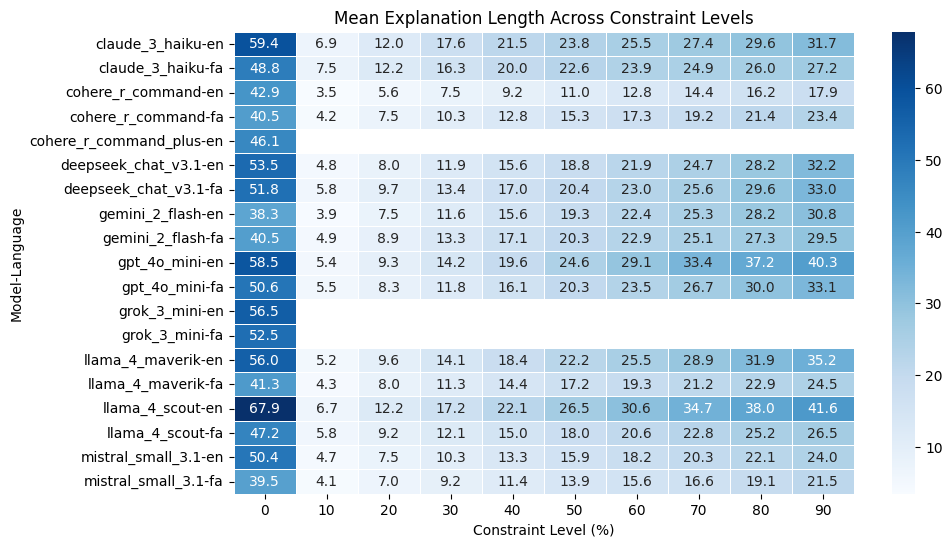

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Mean Explanation Length Across Constraint Levels")
plt.xlabel("Constraint Level (%)")
plt.ylabel("Model-Language")
plt.show()
